<a href="https://colab.research.google.com/github/DhrumilBhatiya/CODSOFT/blob/main/Project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC SURVIVAL PREDICTION**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load The Dataset

In [3]:
titanic = pd.read_csv('drive/MyDrive/CodSoft/Project1/Titanic-Dataset.csv')

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Count The No Of Rows and Columns

In [5]:
titanic.shape

(891, 12)

In [6]:
# Get SOme Statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#remove missing values
titanic = titanic.drop(columns='Cabin', axis=1)

In [10]:
#replace missing values
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

In [11]:
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
# Fix Embarked
print(titanic['Embarked'].mode()[0])

S


In [13]:
#Replace missing values
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [14]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Analysing The Data

In [17]:
# How many survived
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
#Visulizing data
sns.set()

<Axes: ylabel='count'>

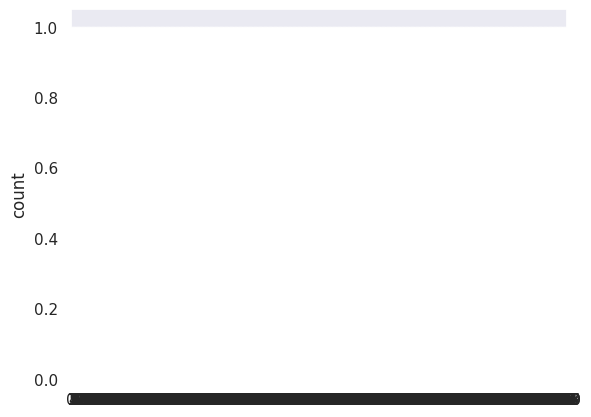

In [19]:
# Number Of People Survived
sns.countplot(titanic['Survived'])

In [20]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='count', ylabel='Sex'>

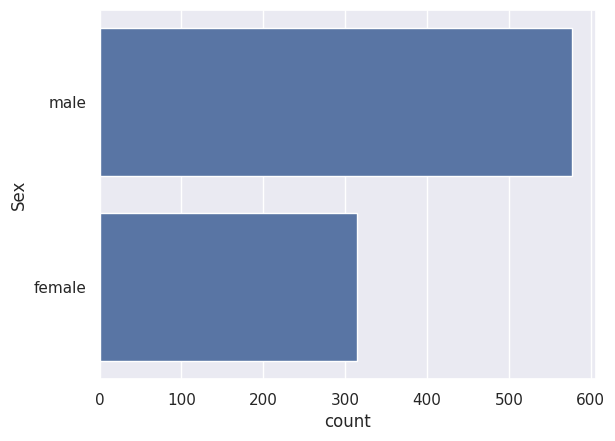

In [21]:
sns.countplot(titanic['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

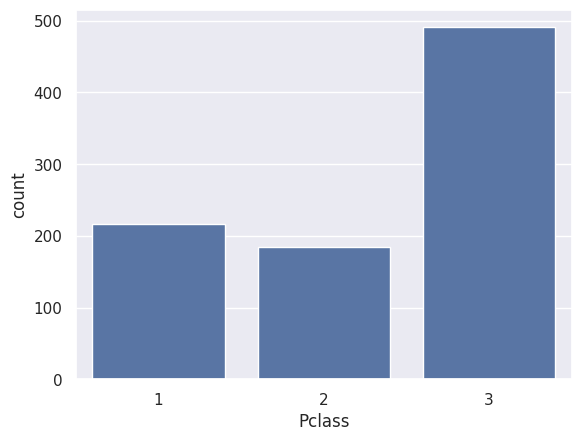

In [22]:
sns.countplot(x='Pclass', data=titanic)

<Axes: xlabel='SibSp', ylabel='count'>

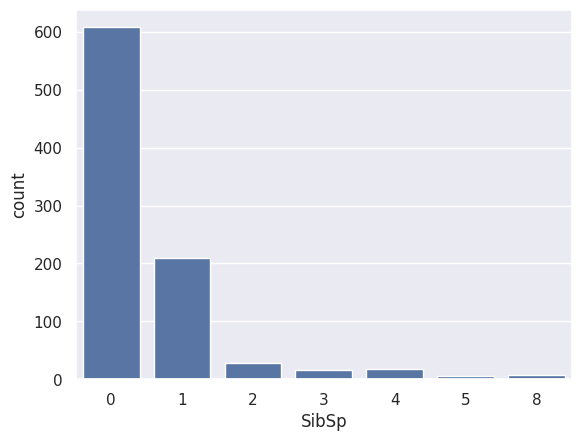

In [23]:
sns.countplot(x='SibSp',data=titanic)

<Axes: xlabel='Parch', ylabel='count'>

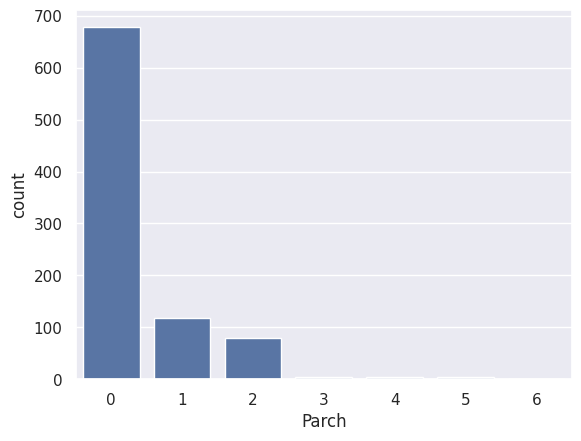

In [24]:
sns.countplot(x='Parch',data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

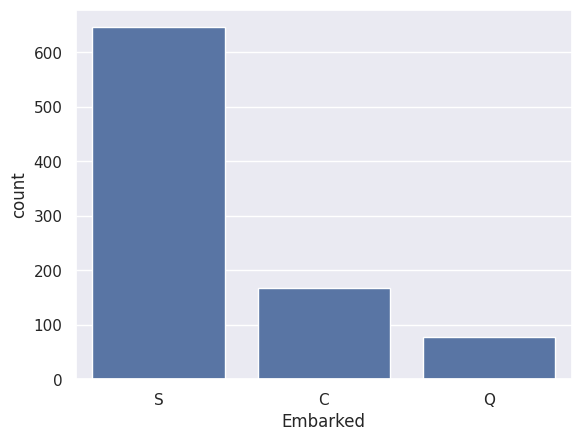

In [25]:
sns.countplot(x='Embarked',data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

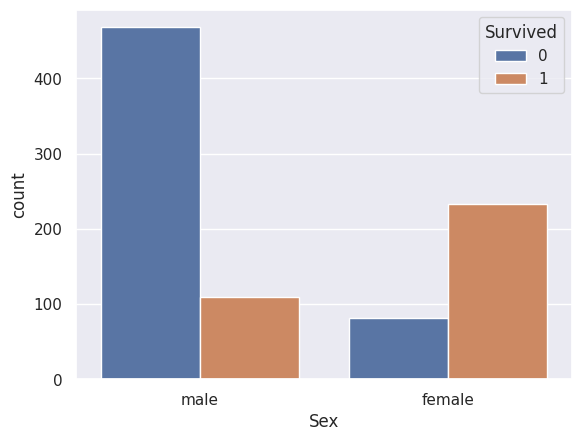

In [26]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

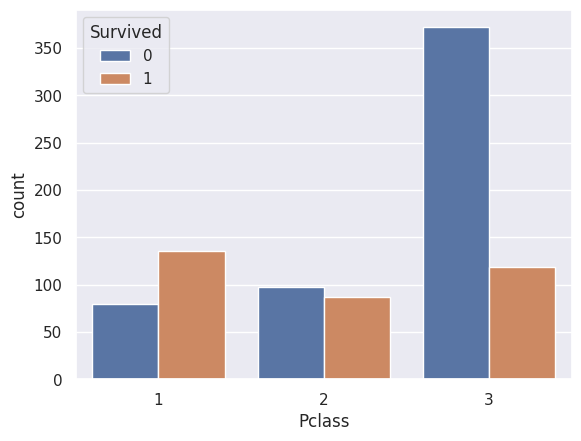

In [27]:
sns.countplot(x='Pclass',hue='Survived',data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

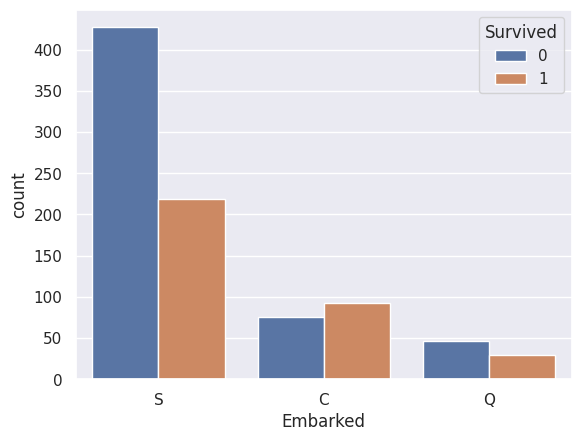

In [28]:
sns.countplot(x='Embarked',hue='Survived',data=titanic)

# Data Preprocessing

In [29]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
titanic = titanic.replace({'Sex':{'male':0,'female':1}})

In [32]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C


In [33]:
titanic = titanic.replace({'Embarked':{'S':1,'C':2,'Q':3}})

In [34]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,2


In [35]:
x=titanic.drop(columns = ['PassengerId','Survived','Name','Ticket'], axis=1)
y=titanic['Survived']

In [36]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
888,3,1,28.0,1,2,23.4500,1
889,1,0,26.0,0,0,30.0000,2


In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Split The Data

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# Implement Model

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predection

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[108  28]
 [ 23  64]]


Text(53.75, 0.5, 'Truth')

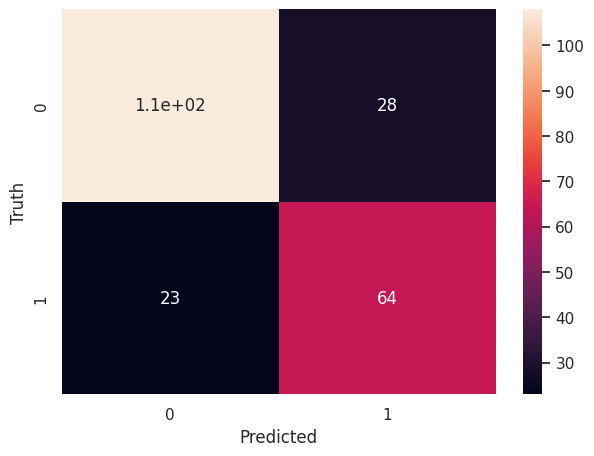

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
#Classification Report
from sklearn.metrics import classification_report

print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       136
           1       0.70      0.74      0.72        87

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [44]:
#Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy Score:",round(accuracy_score(y_test,y_pred),2)*100,"%")

Accuracy Score: 77.0 %


In [45]:
# Make Titanic Pkl
import joblib
joblib.dump(model,'titanic.pkl')

['titanic.pkl']

In [46]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok

ngrok.set_auth_token("2hXuHeckNEX3b6iTobMRjakmQkU_6uoJVinWyNMZfELQ3foNv")

os.system("nohup python -m flask run --no-reload &")

proc = subprocess.Popen(['ngrok', 'http','5000'])
url = ngrok.connect(5000, proto="http")
print(url)

NgrokTunnel: "https://ece1-34-147-18-107.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
# Display Website
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('titanic.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Titanic Survival Prediction</title>
        <style>
            body {
                background-color: black;
                color: white;
                font-family: Arial, sans-serif;
                text-align: center;
                padding: 20px;
            }
            #predictionForm {
                display: inline-block;
                text-align: left;
            }
            img {
                max-width: 100%;
                height: auto;
            }
        </style>
    </head>
    <body>
        <h2>Titanic Survival Prediction</h2>
        <form id="predictionForm" method="post" action="/predict">
            <label for="pclass">Pclass:</label>
            <input type="text" id="pclass" name="pclass"><br><br>

            <label for="sex">Sex (0 for male, 1 for female):</label>
            <input type="text" id="sex" name="sex"><br><br>

            <label for="age">Age:</label>
            <input type="text" id="age" name="age"><br><br>

            <label for="sibsp">SibSp:</label>
            <input type="text" id="sibsp" name="sibsp"><br><br>

            <label for="parch">Parch:</label>
            <input type="text" id="parch" name="parch"><br><br>

            <label for="fare">Fare:</label>
            <input type="text" id="fare" name="fare"><br><br>

            <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
            <input type="text" id="embarked" name="embarked"><br><br>

            <button type="button" onclick="predictSurvival()">Predict</button>
        </form>

        <p id="predictionResult"></p>

        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">

        <script>
            function predictSurvival() {
                var xhr = new XMLHttpRequest();
                var url = "/predict";
                var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

                xhr.open("POST", url, true);
                xhr.onreadystatechange = function () {
                    if (xhr.readyState === 4 && xhr.status === 200) {
                        var response = JSON.parse(xhr.responseText);
                        document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                    }
                };
                xhr.send(data);
            }
        </script>
    </body>
    </html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()

Public URL: NgrokTunnel: "https://f6d2-34-147-18-107.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Jun/2024 13:19:55] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Jun/2024 13:19:56] "GET /favicon.ico HTTP/1.1" 404 -
